# Uber Dataset Analysis

Uber Data Analysis involves studying data related to Uberrides, such as ride times, locations, and user ratings. The 
analysis can be used to understand user behavior, driverpatterns, and areas of high demand. We will use Pandas, numpy,
matplotlib and seaborn which is commonly use for data analysis

# Importing necessary Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import os
os.chdir('C:\\Users\\USER\\Downloads\\')

# Dataset Definition

In [3]:
df=pd.read_csv('C:\\Users\\USER\\Downloads\\UberDataset.csv')
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start hour,End hour
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN,NaN
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,NaN,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,NaN,NaN
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,NaN,NaN
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NaN,NaN
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,NaN,NaN
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting,NaN,NaN
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting,NaN,NaN
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting,NaN,NaN
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit,NaN,NaN


In [4]:
df.tail(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start hour,End hour
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Karachi,Karachi,2.9,Errand/Supplies,NaN,NaN
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Karachi,Karachi,4.6,Errand/Supplies,NaN,NaN
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Karachi,Karachi,4.6,Meeting,NaN,NaN
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Karachi,Karachi,0.8,Customer Visit,NaN,NaN
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting,NaN,NaN
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site,NaN,NaN
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,NaN,NaN
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,NaN,NaN
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaN,NaN
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN,NaN,NaN


# Exploratory Data Analysis

In [5]:
df.shape

(1156, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     654 non-null    object 
 7   start hour  0 non-null      float64
 8   End hour    0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 81.4+ KB


In [7]:
pd.isnull(df).sum()

START_DATE       0
END_DATE         1
CATEGORY         1
START            1
STOP             1
MILES            0
PURPOSE        502
start hour    1156
End hour      1156
dtype: int64

In [8]:
df['MILES'].describe()

count     1156.000000
mean        21.115398
std        359.299007
min          0.500000
25%          2.900000
50%          6.000000
75%         10.400000
max      12204.700000
Name: MILES, dtype: float64

# Data cleaning

Start date and End date is not in proper format we will replace and arrange in proper format.

In [9]:
df['START_DATE']=df['START_DATE'].str.replace('/','-')

In [10]:
df['END_DATE']=df['END_DATE'].str.replace('/','-')

In [11]:
df.isnull().sum()

START_DATE       0
END_DATE         1
CATEGORY         1
START            1
STOP             1
MILES            0
PURPOSE        502
start hour    1156
End hour      1156
dtype: int64

all the values in last two columns contains NA values . so we will remove last two columns

In [12]:
df=df.drop(['start hour','End hour'],axis=1)

In [13]:
df.shape

(1156, 7)

In PURPOSE columns, 502 blank values. we will replace it with "NA" so that we will get a proper view of
dataset for a better analysis

In [14]:
df = df.applymap(lambda x: "NA" if str(x).strip() == "" else x)

we will drop last row as it is unnecessary and just making crowd.

In [15]:
df = df.drop(df.index[-1])

In [35]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m-%d-%Y %H:%M')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m-%d-%Y %H:%M')
df['DAY_OF_WEEK']=df['START_DATE'].dt.day_name()
df['TIME_OF_DAY']=df['START_DATE'].dt.hour

In [36]:
df['DURATION']=df['END_DATE']-df['START_DATE']

In [37]:
average_duration=df['DURATION'].mean()
average_duration

Timedelta('0 days 00:23:14.597402597')

Now the dataset is ready and we can go for visualization

# Data Visualization

In [16]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [17]:
purpose_count=df['PURPOSE'].value_counts().sort_values(ascending=False)

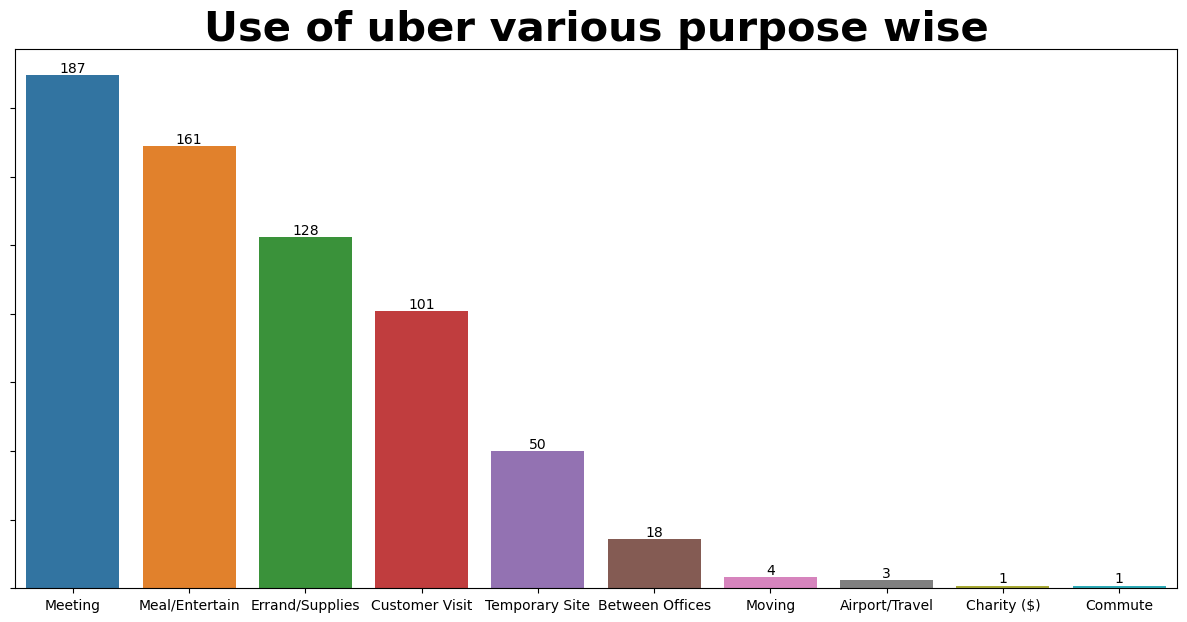

In [18]:
plt.figure(figsize=(15,7))
# sns.set(rc={'figure.figsize':(10,5)})
aa=sns.barplot(x=purpose_count.index, y=purpose_count.values,data=df)
plt.title('Use of uber various purpose wise',fontsize=30,fontweight='bold')
plt.gca().set_yticklabels([])
for bars in aa.containers:
    aa.bar_label(bars)

From the above plot,we can observe the customers preferrance to take uber ride in various purpose. we found that maximum
time people like to take uber ride for meeting. other most likely purposes are entertainment, supplies, customer visit etc.

C:\Users\USER\AppData\Local\Temp\ipykernel_9160\3505160773.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['TIME_OF_DAY'],color='red')
C:\Users\USER\AppData\Local\Temp\ipykernel_9160\3505160773.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['MILES'],color='red')


<Axes: title={'center': 'Ditribution of miles'}, xlabel='Miles', ylabel='Density'>

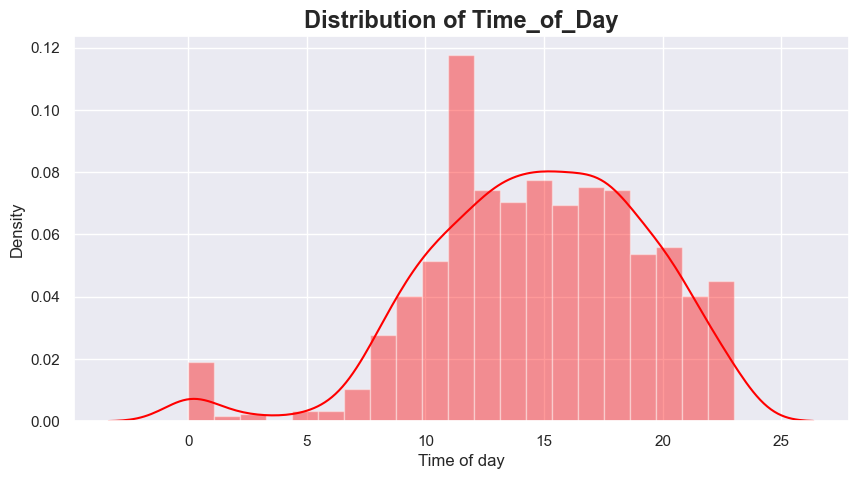

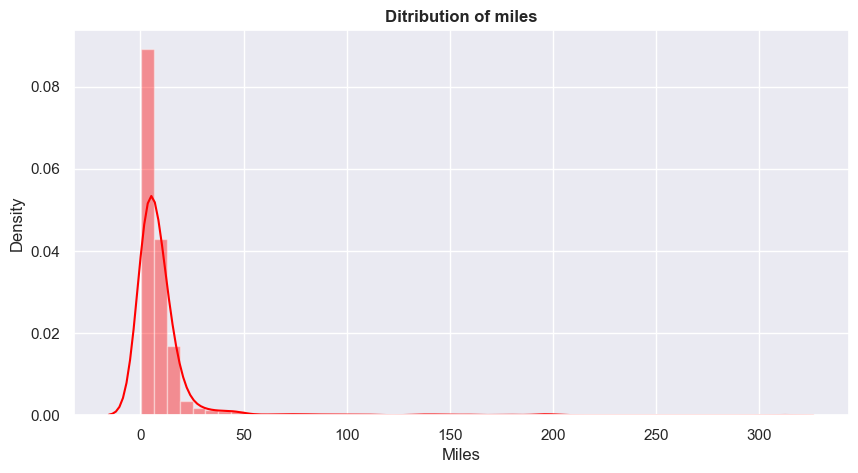

In [39]:
# fig,ax=plt.subplots(1,1,figsize=(10,10))
# plt.figure(figsize=(5,5))
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel("Time of day")
plt.title('Distribution of Time_of_Day',fontweight='bold',fontsize=17)
sns.distplot(x=df['TIME_OF_DAY'],color='red')
plt.figure(figsize=(10,5))
plt.title('Ditribution of miles',fontweight='bold')
plt.xlabel('Miles')
sns.distplot(x=df['MILES'],color='red')

from the above distribution plots,we found that people are likely to prefer taking maximum rides between 11 am to 6 pm also 
maximum customers preferring taking ride of average 10 miles.


In [25]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'DURATION', 'DAY_OF_WEEK', 'TIME_OF_DAY'],
      dtype='object')

<Axes: title={'center': 'Category vs Miles'}, xlabel='CATEGORY', ylabel='MILES'>

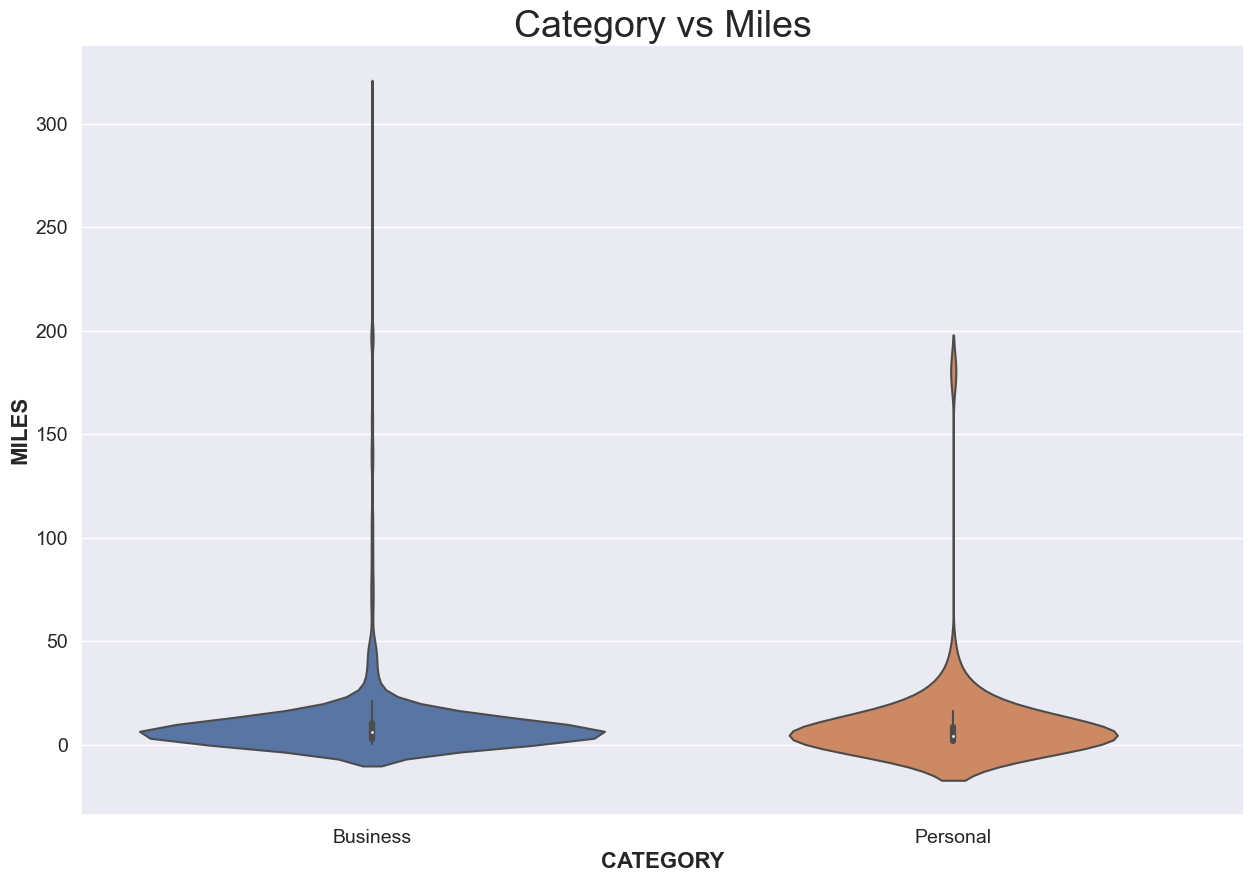

In [26]:
# fig,axes=plt.subplots(figsize=(15,10))
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Category vs Miles',fontsize=27)
plt.xlabel('CATEGORY',fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('MILES',fontsize=16,fontweight='bold')
sns.violinplot(x='CATEGORY',y='MILES',data=df,fontsize=24)

Above violin plot represent the distance covered by uber category wise & we conclude that customers like to taking uber ride 
for Business category rather than Personal use.


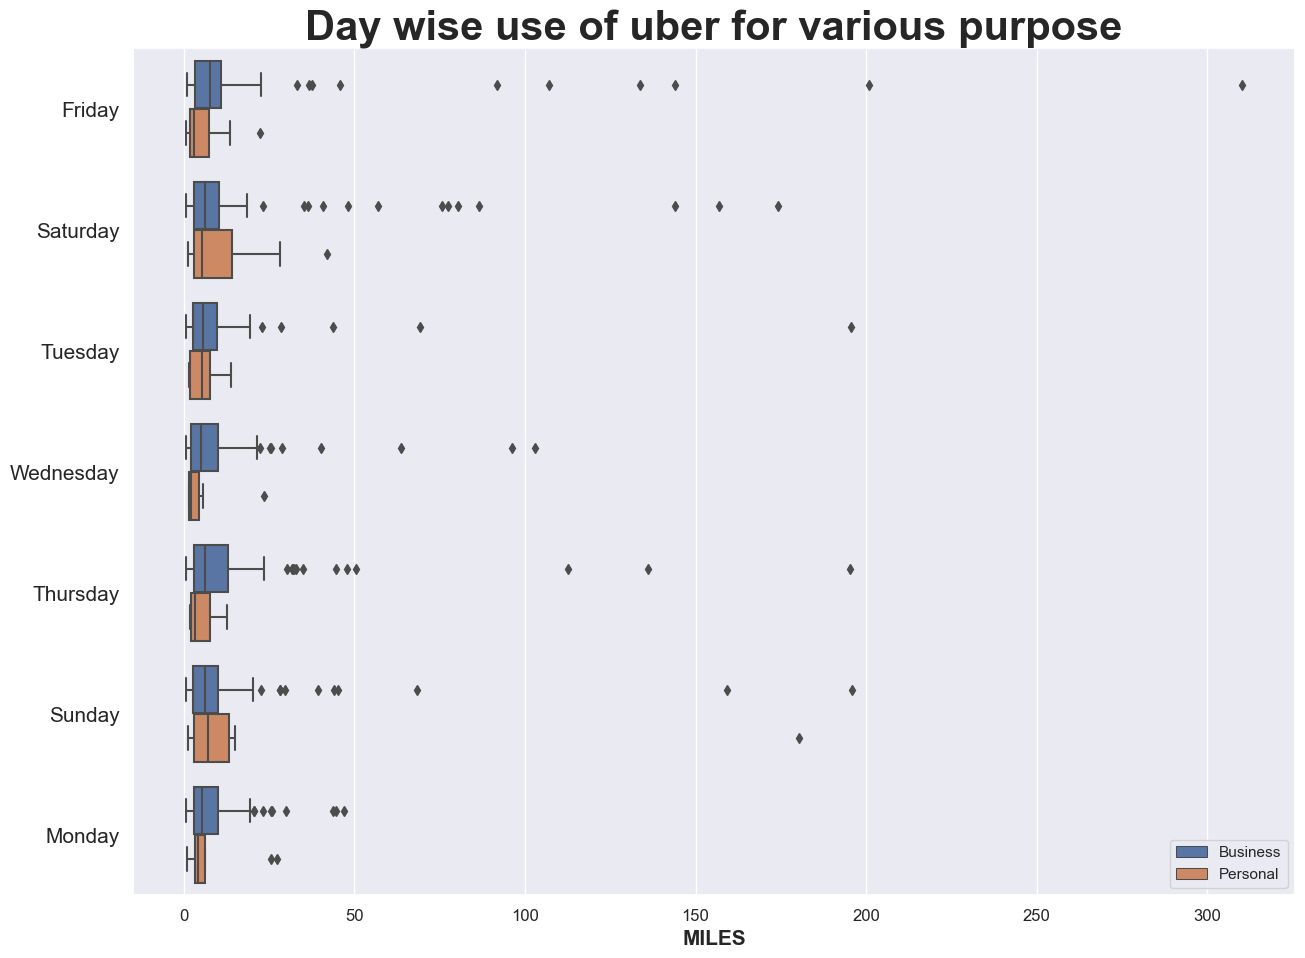

In [27]:
# fig,ax=plt.subplots(figsize=(15,11))
sns.set(rc={'figure.figsize':(15,11)})
sns.boxplot(x='MILES',y='DAY_OF_WEEK',data=df,hue='CATEGORY')
plt.legend(loc='best')
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel('MILES',fontsize=15,fontweight='bold')
plt.title('Day wise use of uber for various purpose',fontsize=30,fontweight='bold')
plt.show()

we can visually compare the distribution of 'MILES' for each day of the week. also we can compare the 'MILES' distribution 
between different trip categories ('Business' and 'Personal'). The difference in the Day of the week is observed by the 
median value for different category level.

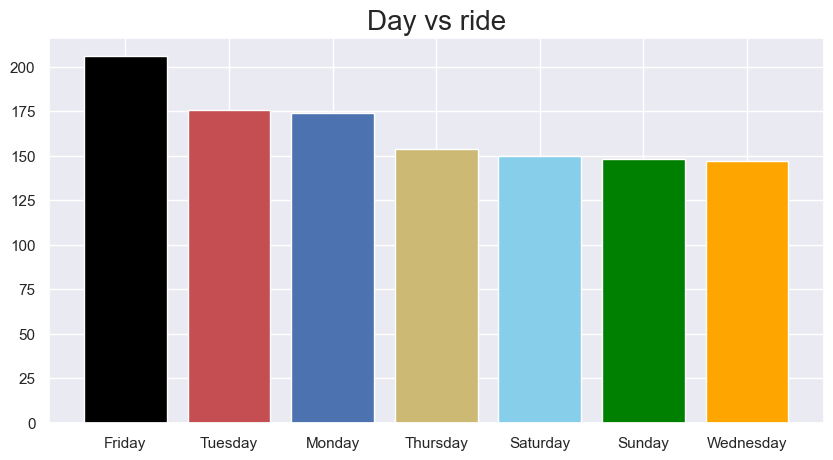

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
day_of_week=['Friday','Tuesday','Monday','Thursday','Saturday','Sunday','Wednesday']
values=[206,176,174,154,150,148,147]
plt.bar(day_of_week,values,color=('black','r','b','y','skyblue','green','orange'))
plt.title("Day vs ride",fontsize=20)
plt.show()

This is the day wise data of uber oon the basis of no of rides. Friday lead the days of week as people demand maximum 
ride on that day.

<BarContainer object of 2 artists>

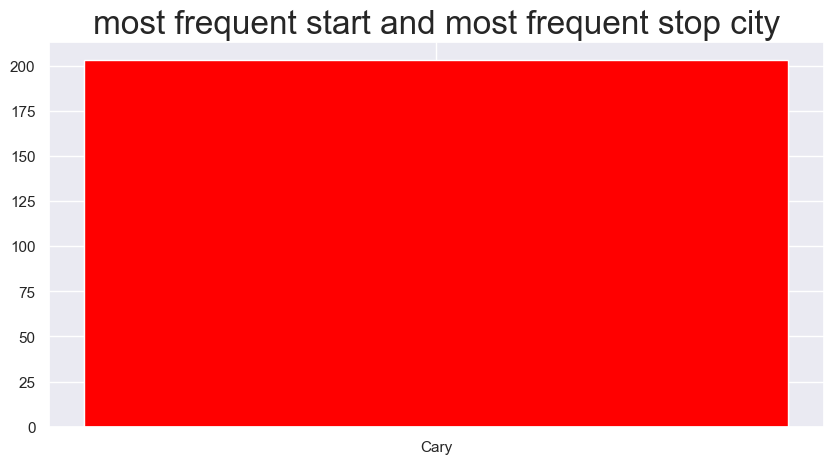

In [29]:
most_frequent_start=df['START'].mode().iloc[0]
most_frequent_stop=df['STOP'].mode().iloc[0]
locations = [most_frequent_start, most_frequent_stop]
counts = [df['START'].value_counts()[most_frequent_start], df['STOP'].value_counts()[most_frequent_stop]]
plt.title('most frequent start and most frequent stop city',fontsize=24)
plt.bar(locations, counts, color='red')

In [30]:
ay=df['STOP'].value_counts().sort_values(ascending=False).head(5)
ay

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Name: STOP, dtype: int64

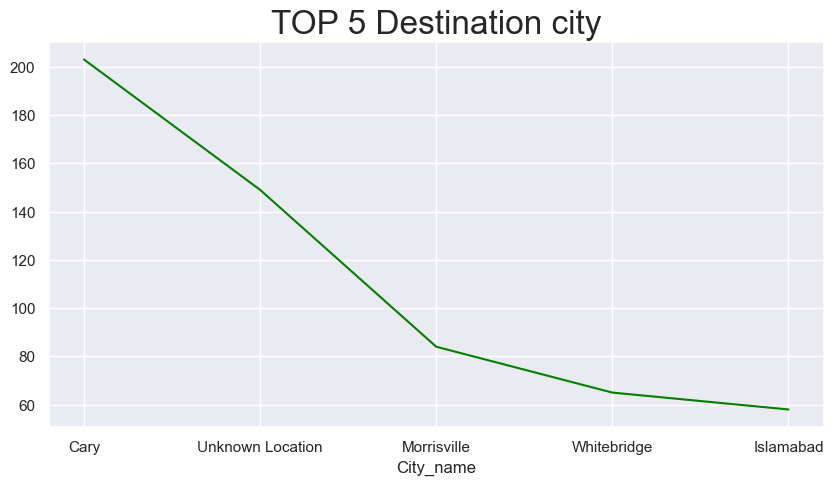

In [31]:
most_frequent_stop=['Cary','Unknown Location','Morrisville','Whitebridge','Islamabad']
no_of_time=[203,149,84,65,58]
data1=pd.DataFrame({'City_name':most_frequent_stop,'no_of_time':no_of_time})
# sns.lineplot(x='most_frequent_start',y='no_of_times',data=data)
sns.lineplot(x='City_name',y='no_of_time',data=data1,color='Green')
plt.ylabel('')
plt.title('TOP 5 Destination city',fontsize=24)
plt.show()

we found that most frequent start and stop city is "CARY" also i have plotted top 5 destination city with the help of line graph
which represent a clear view for location on the basis of no_of_times

In [32]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'DURATION', 'DAY_OF_WEEK', 'TIME_OF_DAY'],
      dtype='object')

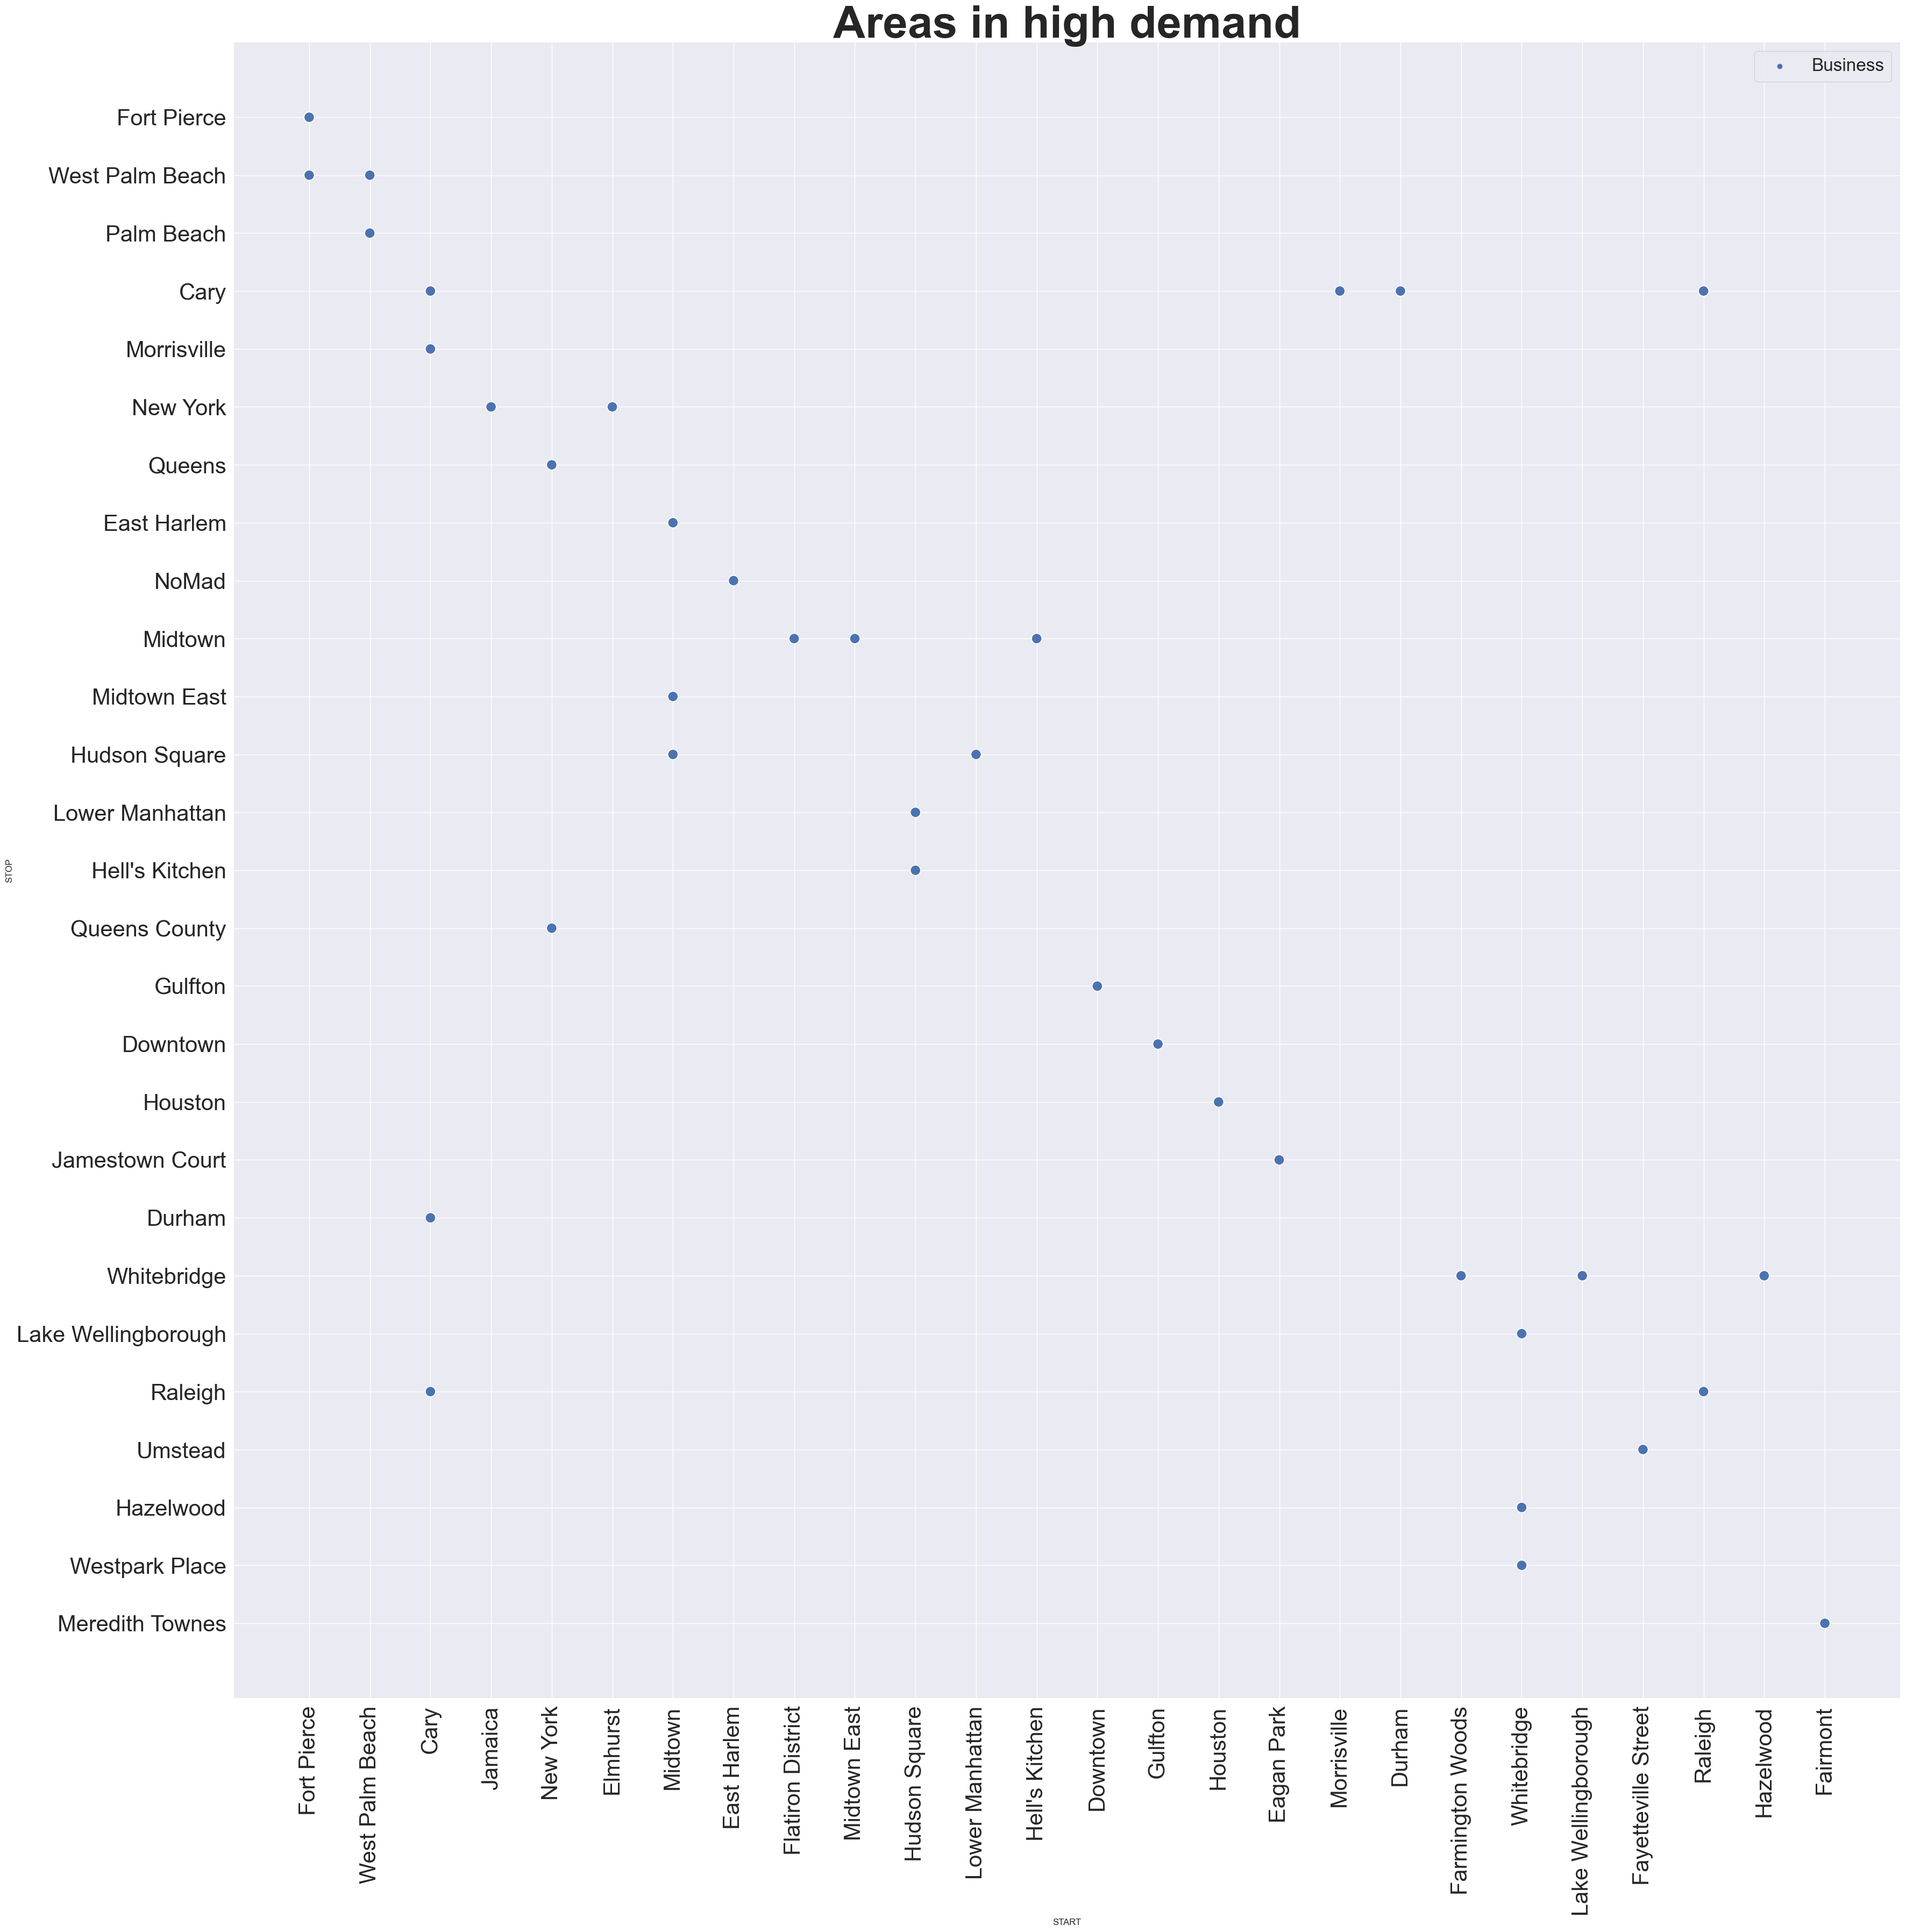

In [40]:
plt.figure(figsize=(40,40))
sns.scatterplot(data=df.head(50),x='START',y='STOP',hue='CATEGORY',s=190)
plt.legend(fontsize=24)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xticks(rotation=90)
plt.title('Areas in high demand',fontsize=60,fontweight='bold')
plt.show()

Above plot represent the areas in high demand like which are the most boarding city and which are the most destination city
hence it helps us to observe in which cities uber are in high demand, moderate demand or less demand

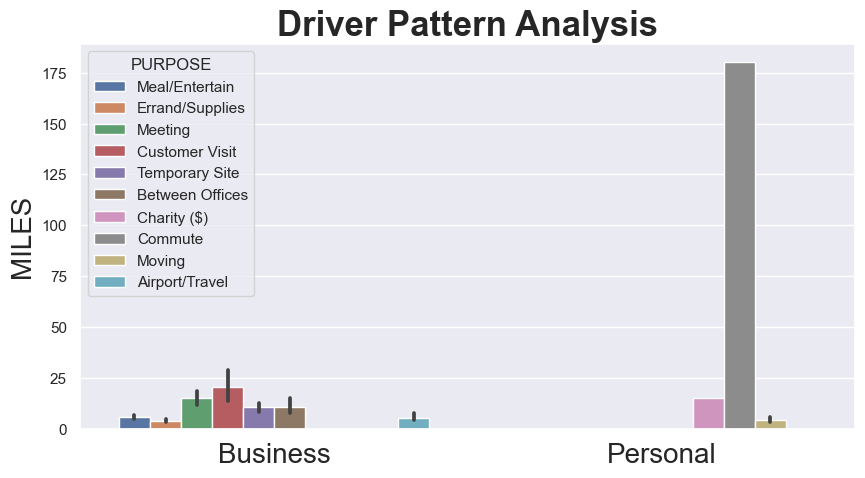

In [34]:
sns.barplot(x='CATEGORY',y='MILES',hue='PURPOSE',data=df)
plt.title('Driver Pattern Analysis',fontsize=25,fontweight='bold')
plt.xticks(fontsize=20)
plt.ylabel('MILES',fontsize=20)
plt.xlabel('')
plt.show()